In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import subprocess
import concurrent.futures
import shutil

In [60]:
regions = ['us-central1-a', 'europe-west3-c', 'asia-south1-c']

In [65]:
for i in [0,1,2]:
    

    cmd = 'gcloud compute instances create flwr-'+f"{i:03}"+' \
    --project=ucr-ursa-major-lesani-lab \
    --zone='+regions[i]+' \
    --machine-type=n1-standard-1 \
    --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default \
    --maintenance-policy=MIGRATE \
    --provisioning-model=STANDARD \
    --service-account=961693926925-compute@developer.gserviceaccount.com \
    --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/trace.append \
    --create-disk=auto-delete=yes,boot=yes,device-name=instance-20240829-120659,image=projects/debian-cloud/global/images/debian-12-bookworm-v20240815,mode=rw,size=30,type=pd-balanced \
    --no-shielded-secure-boot \
    --shielded-vtpm \
    --shielded-integrity-monitoring \
    --labels=goog-ec-src=vm_add-gcloud \
    --reservation-affinity=any'
    
    os.system(cmd)

Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/us-central1-a/instances/flwr-000].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE   PREEMPTIBLE  INTERNAL_IP    EXTERNAL_IP   STATUS
flwr-000  us-central1-a  n1-standard-1               10.128.15.206  34.72.52.250  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/flwr-001].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE            MACHINE_TYPE   PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP   STATUS
flwr-001  europe-west3-c  n1-standard-1               10.156.0.25  35.198.72.77  RUNNING


Created [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/flwr-002].
 - Disk size: '30 GB' is larger than image size: '10 GB'. You might need to resize the root repartition manually if the operating system does not support automatic resizing. See https://cloud.google.com/compute/docs/disks/add-persistent-disk#resize_pd for details.



NAME      ZONE           MACHINE_TYPE   PREEMPTIBLE  INTERNAL_IP  EXTERNAL_IP     STATUS
flwr-002  asia-south1-c  n1-standard-1               10.160.0.29  35.200.186.214  RUNNING


In [66]:
os.system('git add .; git commit -m "fc"; git push origin')

[main f12fd5c1] fc
 4 files changed, 63756 insertions(+), 62208 deletions(-)


To github.com:tejas-shivanand-mane/flower.git
   ea5093be..f12fd5c1  main -> main


0

In [16]:
def initialize(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo apt -y install git; git clone https://github.com/tejas-shivanand-mane/flower.git;cd flower"'
    os.system(command)

In [17]:
def git_pull(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; git pull;"'
    os.system(command)

In [18]:
def setup(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd flower; sudo sh setup.sh"'
    os.system(command)

In [19]:
def clean(i):
    command = 'gcloud compute ssh --zone "us-central1-a" "flwr-'+f"{i:03}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm -r flower"'
    os.system(command)

In [13]:
time.sleep(45)

In [67]:
results = Parallel(n_jobs=60)(delayed(initialize)(i) for i in range(3))

Reading package lists...


Building dependency tree...
Reading state information...


The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 9377 kB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:2 https://deb.debian.org/debian bookworm/main amd64 liberror-perl all 0.17029-2 [29.0 kB]
Get:3 https://deb.debian.org/debian bookworm/main amd64 git-man all 1:2.39.2-1.1 [2049 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 git amd64 1:2.39.2-1.1 [7171 kB]
Get:5 https://deb.debian.org/debian bookworm/main amd64 patch amd64 2.7.6-7 [128 kB]




debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Reading package lists...Fetched 9377 kB in 1s (16.9 MB/s)
Selecting previously unselected package liberror-perl.
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...

Building dependency tree...
Reading state information...
Reading package lists...The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch
0 upgraded, 4 newly installed, 0 to remove a

Get:2 https://deb.debian.org/debian bookworm/main amd64 liberror-perl all 0.17029-2 [29.0 kB]
Get:3 https://deb.debian.org/debian bookworm/main amd64 git-man all 1:2.39.2-1.1 [2049 kB]
Get:4 https://deb.debian.org/debian bookworm/main amd64 git amd64 1:2.39.2-1.1 [7171 kB]
Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
Get:5 https://deb.debian.org/debian bookworm/main amd64 patch amd64 2.7.6-7 [128 kB]
Setting up liberror-perl (0.17029-2) ...
Setting up patch (2.7.6-7) ...
Setting up git-man (1:2.39.2-1.1) ...
Setting up git (1:2.39.2-1.1) ...
Processing triggers for man-db (2.11.2-2) ...
Fetched 9377 kB in 0s (51.8 MB/s)
Selecting previously unselected package liberror-perl.


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 



(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...

Reading state information...
The following additional packages will be installed:
  git-man liberror-perl patch
Suggested packages:
  git-daemon-run | git-daemon-sysvinit git-doc git-email git-gui gitk gitweb
  git-cvs git-mediawiki git-svn ed diffutils-doc
The following NEW packages will be installed:
  git git-man liberror-perl patch
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
0 upgraded, 4 newly installed, 0 to remove and 0 not upgraded.
Need to get 9377 kB of archives.
After this operation, 48.0 MB of additional disk space will be used.
Get:1 file:/etc/apt/mirrors/debian.list Mir

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
(Reading database ... 69231 files and directories currently installed.)
Preparing to unpack .../liberror-perl_0.17029-2_all.deb ...
Unpacking liberror-perl (0.17029-2) ...
Selecting previously unselected package git-man.
Preparing to unpack .../git-man_1%3a2.39.2-1.1_all.deb ...
Unpacking git-man (1:2.39.2-1.1) ...
Setting up liberror-perl (0.17029-2) ...
Setting up patch (2.7.6-7) ...
Selecting previously unselected package git.
Preparing to unpack .../git_1%3a2.39.2-1.1_amd64.deb ...
Unpacking git (1:2.39.2-1.1) ...
Setting up git-man (1:2.39.2-1.1) ...
Setting up git (1:2.39.2-1.1) ...
Processing triggers for man-db (2.11.2-2) ...
Selecting previously unselected package patch.
Preparing to unpack .../patch_2.7.6-7_amd64.deb ...
Unpacking patch (2.7.6-7) ...
Setting up liberror-perl (0.17029-2) ...
Setting up patch (2.7.6-7) ...
Setting up git-man (1:2.39.2

Cloning into 'flower'...
Cloning into 'flower'...
Cloning into 'flower'...


In [49]:
# os.system('git add .; git commit -m "fc"; git push origin')
# results = Parallel(n_jobs=60)(delayed(git_pull)(i) for i in range(3))

[main 3cca141c] fc
 2 files changed, 18 insertions(+), 18 deletions(-)


To github.com:tejas-shivanand-mane/flower.git
   de0ba5b9..3cca141c  main -> main
From https://github.com/tejas-shivanand-mane/flower
   de0ba5b9..3cca141c  main       -> origin/main


Updating de0ba5b9..3cca141c
Fast-forward
 .../pytorch-from-centralized-to-federated/cifar.py |  2 +-
 flwr.ipynb                                         | 34 +++++++++++-----------
 2 files changed, 18 insertions(+), 18 deletions(-)


From https://github.com/tejas-shivanand-mane/flower
   de0ba5b9..3cca141c  main       -> origin/main


Updating de0ba5b9..3cca141c
Fast-forward
 .../pytorch-from-centralized-to-federated/cifar.py |  2 +-
 flwr.ipynb                                         | 34 +++++++++++-----------
 2 files changed, 18 insertions(+), 18 deletions(-)


From https://github.com/tejas-shivanand-mane/flower
   de0ba5b9..3cca141c  main       -> origin/main


Updating de0ba5b9..3cca141c
Fast-forward
 .../pytorch-from-centralized-to-federated/cifar.py |  2 +-
 flwr.ipynb                                         | 34 +++++++++++-----------
 2 files changed, 18 insertions(+), 18 deletions(-)


In [68]:
results = Parallel(n_jobs=60)(delayed(setup)(i) for i in range(3))

Get:1 file:/etc/apt/mirrors/debian.list Mirrorlist [30 B]
Get:5 file:/etc/apt/mirrors/debian-security.list Mirrorlist [39 B]
Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:8 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:9 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable/main amd64 Packages [3128 B]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:10 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main amd64 Packages [3282 kB]
Get:11 https://deb.debian.org/debian bookworm/main Sources [9487 kB]
Get:14 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main all Packages [1538 kB]
Get:12 https://deb.debian.org/d

Get:9 https://deb.debian.org/debian bookworm/main Sources [9487 kB]
Get:10 https://deb.debian.org/debian bookworm/main amd64 Packages [8787 kB]
Get:11 https://deb.debian.org/debian bookworm/main Translation-en [6109 kB]
Get:15 https://deb.debian.org/debian bookworm-backports/main Sources.diff/Index [63.3 kB]
Get:16 https://deb.debian.org/debian bookworm-backports/main amd64 Packages.diff/Index [63.3 kB]
Get:17 https://deb.debian.org/debian bookworm-backports/main Translation-en.diff/Index [63.3 kB]
Get:18 https://deb.debian.org/debian bookworm-backports/main Sources T-2024-09-06-0805.29-F-2024-08-15-1430.47.pdiff [64.8 kB]
Get:12 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable/main amd64 Packages [3128 B]
Get:22 https://deb.debian.org/debian bookworm-backports/main amd64 Packages T-2024-09-06-0805.29-F-2024-08-15-1430.47.pdiff [37.5 kB]
Get:18 https://deb.debian.org/debian bookworm-backports/main Sources T-2024-09-06-0805.29-F-2024-08-15-1430.47.pdiff [64.8 

Get:19 https://deb.debian.org/debian-security bookworm-security/main Sources [109 kB]
Get:2 https://deb.debian.org/debian bookworm InRelease [151 kB]
Get:7 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable InRelease [1321 B]
Get:3 https://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:20 https://deb.debian.org/debian-security bookworm-security/main amd64 Packages [179 kB]
Get:21 https://deb.debian.org/debian-security bookworm-security/main Translation-en [108 kB]
Get:4 https://deb.debian.org/debian bookworm-backports InRelease [56.6 kB]
Get:6 https://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:8 https://packages.cloud.google.com/apt cloud-sdk-bookworm InRelease [1654 B]
Get:9 https://packages.cloud.google.com/apt google-compute-engine-bookworm-stable/main amd64 Packages [3128 B]
Get:10 https://deb.debian.org/debian bookworm/main Sources [9487 kB]
Get:22 https://packages.cloud.google.com/apt cloud-sdk-bookworm/main a

Reading package lists...
Building dependency tree...
Reading state information...
Fetched 30.2 MB in 5s (6596 kB/s)
Reading package lists...The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu bzip2 cpp cpp-12 dpkg-dev
  fakeroot fontconfig-config fonts-dejavu-core g++ g++-12 gcc gcc-12
  libabsl20220623 libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libalgorithm-merge-perl libaom3 libasan8 libatomic1 libavif15 libbinutils
  libc-bin libc-dev-bin libc-devtools libc6 libc6-dev libcc1-0 libcrypt-dev
  libctf-nobfd0 libctf0 libdav1d6 libde265-0 libdeflate0 libdpkg-perl
  libfakeroot libfile-fcntllock-perl libfontconfig1 libgav1-1 libgcc-12-dev
  libgd3 libgomp1 libgprofng0 libheif1 libisl23 libitm1 libjansson4 libjbig0
  libjpeg62-turbo liblerc4 liblocale-gettext-perl liblsan0 libmpc3 libmpfr6
  libnsl-dev libnuma1 libquadmath0 librav1e0 libstdc++-12-dev libsvtav1enc1
  libtiff6 libtirpc-dev libtsan2 libubsan1 libwebp7 libx11-6 libx


Reading state information...
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu bzip2 cpp cpp-12 dpkg-dev
  fakeroot fontconfig-config fonts-dejavu-core g++ g++-12 gcc gcc-12
  libabsl20220623 libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libalgorithm-merge-perl libaom3 libasan8 libatomic1 libavif15 libbinutils
  libc-bin libc-dev-bin libc-devtools libc6 libc6-dev libcc1-0 libcrypt-dev
  libctf-nobfd0 libctf0 libdav1d6 libde265-0 libdeflate0 libdpkg-perl
  libfakeroot libfile-fcntllock-perl libfontconfig1 libgav1-1 libgcc-12-dev
  libgd3 libgomp1 libgprofng0 libheif1 libisl23 libitm1 libjansson4 libjbig0
  libjpeg62-turbo liblerc4 liblocale-gettext-perl liblsan0 libmpc3 libmpfr6
  libnsl-dev libnuma1 libquadmath0 librav1e0 libstdc++-12-dev libsvtav1enc1
  libtiff6 libtirpc-dev libtsan2 libubsan1 libwebp7 libx11-6 libx11-data
  libx265-199 libxau6 libxcb1 libxdmcp6 libxpm4 libyuv0 linux-libc-dev make
  manpages-dev rpcsvc-prot

Get:74 https://deb.debian.org/debian bookworm/main amd64 libx11-data all 2:1.8.4-2+deb12u2 [292 kB]
Get:75 https://deb.debian.org/debian bookworm/main amd64 libx11-6 amd64 2:1.8.4-2+deb12u2 [760 kB]
Get:58 https://deb.debian.org/debian bookworm/main amd64 libjpeg62-turbo amd64 1:2.1.5-2 [166 kB]
Get:59 https://deb.debian.org/debian bookworm/main amd64 libyuv0 amd64 0.0~git20230123.b2528b0-1 [168 kB]
Get:60 https://deb.debian.org/debian bookworm/main amd64 libavif15 amd64 0.11.1-1 [93.8 kB]
Get:61 https://deb.debian.org/debian bookworm/main amd64 libfontconfig1 amd64 2.14.1-4 [386 kB]
Get:62 https://deb.debian.org/debian bookworm/main amd64 libde265-0 amd64 1.0.11-1+deb12u2 [185 kB]
Get:63 https://deb.debian.org/debian bookworm/main amd64 libnuma1 amd64 2.0.16-1 [21.0 kB]
Get:64 https://deb.debian.org/debian bookworm/main amd64 libx265-199 amd64 3.5-2+b1 [1150 kB]
Get:76 https://deb.debian.org/debian bookworm/main amd64 libxpm4 amd64 1:3.5.12-1.1+deb12u1 [48.6 kB]
Get:77 https://deb.deb

apt-listchanges: Reading changelogs...
apt-listchanges: Reading changelogs...
Reading package lists...
Building dependency tree...
Reading state information...
Fetched 83.2 MB in 2s (41.8 MB/s)


debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../libc6_2.36-9+deb12u8_amd64.deb ...
The following additional packages will be installed:
  binutils binutils-common binutils-x86-64-linux-gnu bzip2 cpp cpp-12 dpkg-dev
  fakeroot fontconfig-config fonts-dejavu-core g++ g++-12 gcc gcc-12
  libabsl20220623 libalgorithm-diff-perl libalgorithm-diff-xs-perl
  libalgorithm-merge-perl libaom3 libasan8 libatomic1 libavif15 libbinutils
  libc-bin libc-dev-bin libc-devtools libc6 libc6-dev libcc1-0 libcrypt-dev
  libctf-nobfd0 libctf0 libdav1d6 libde265-0 libdeflate0 libdpkg-perl
  libfakeroot libfile-fcntllock-perl libfontconfig1 libgav1-1 libgcc-12-dev
  libgd3 libgomp1 libgprofng0 libheif1 libisl23 libitm1 libjansson4 libjbig0
  libjpeg62-turbo liblerc4 liblocale-gettext-perl liblsan0 libmpc3 libmpfr6
  libnsl-dev libnuma1 libquadmath0 librav1e0 libstdc++-12-dev libsvtav1enc1
  libtiff6 libtirpc-dev libtsan2 libubsan1 libwebp7 libx11-6 libx11-data
 

Get:54 https://deb.debian.org/debian bookworm/main amd64 libdav1d6 amd64 1.0.0-2+deb12u1 [513 kB]
Get:55 https://deb.debian.org/debian bookworm/main amd64 libgav1-1 amd64 0.18.0-1+b1 [332 kB]
Get:56 https://deb.debian.org/debian bookworm/main amd64 librav1e0 amd64 0.5.1-6 [763 kB]
(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../libc-bin_2.36-9+deb12u8_amd64.deb ...
Unpacking libc-bin (2.36-9+deb12u8) over (2.36-9+deb12u7) ...
Get:57 https://deb.debian.org/debian bookworm/main amd64 libsvtav1enc1 amd64 1.4.1+dfsg-1 [2121 kB]
Setting up libc-bin (2.36-9+deb12u8) ...
Get:58 https://deb.debian.org/debian bookworm/main amd64 libjpeg62-turbo amd64 1:2.1.5-2 [166 kB]
Get:59 https://deb.debian.org/debian bookworm/main amd64 libyuv0 amd64 0.0~git20230123.b2528b0-1 [168 kB]
Selecting previously unselected package liblocale-gettext-perl.
Get:60 https://deb.debian.org/debian bookworm/main amd64 libavif15 amd64 0.11.1-1 [93.8 kB]
Get:61 https://deb.de

debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 83.2 MB in 2s (50.9 MB/s)
(Reading database ... 70337 files and directories currently installed.)
Preparing to unpack .../libc6_2.36-9+deb12u8_amd64.deb ...
debconf: unable to initialize frontend: Dialog
debconf: (Dialog frontend will not work on a dumb terminal, an emacs shell buffer, or without a controlling terminal.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Unpacking libc6:amd64 (2.36-9+deb12u8) over (2.36-9+deb12u7) ...
Selecting previously unselected package libbinutils:amd64.
Preparing to unpack .../03-libbinutils_2.40-2_amd64.deb ...
Unpacking libbinutils:amd64 (2.40-2) ...
Selecting previously unselected package libctf-nobfd0:amd64.
Preparing to unpack .../04-libctf-nobfd0_2.40-2_amd64.deb ...
Unpacking libctf-nobfd0:amd64 (2.40-2) ...
Selecting previously unselected package libgprofng0:amd64.
Preparing to unpack .../06-li

Selecting previously unselected package cpp.
Selecting previously unselected package cpp.
Preparing to unpack .../21-cpp_4%3a12.2.0-3_amd64.deb ...
Unpacking cpp (4:12.2.0-3) ...
Preparing to unpack .../21-cpp_4%3a12.2.0-3_amd64.deb ...
Unpacking cpp (4:12.2.0-3) ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../22-libcc1-0_12.2.0-14_amd64.deb ...
Selecting previously unselected package libcc1-0:amd64.
Preparing to unpack .../22-libcc1-0_12.2.0-14_amd64.deb ...
Unpacking libcc1-0:amd64 (12.2.0-14) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../23-libgomp1_12.2.0-14_amd64.deb ...
Unpacking libgomp1:amd64 (12.2.0-14) ...
Selecting previously unselected package libitm1:amd64.
Preparing to unpack .../24-libitm1_12.2.0-14_amd64.deb ...
Unpacking libitm1:amd64 (12.2.0-14) ...
Unpacking libcc1-0:amd64 (12.2.0-14) ...
Selecting previously unselected package libgomp1:amd64.
Preparing to unpack .../23-libgomp1_12.2.0-14_amd64

Selecting previously unselected package build-essential.
Preparing to unpack .../40-build-essential_12.9_amd64.deb ...
Unpacking build-essential (12.9) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../41-libfakeroot_1.31-1.2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.31-1.2) ...
Selecting previously unselected package dpkg-dev.
Preparing to unpack .../39-dpkg-dev_1.21.22_all.deb ...
Unpacking dpkg-dev (1.21.22) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../42-fakeroot_1.31-1.2_amd64.deb ...
Unpacking fakeroot (1.31-1.2) ...
Selecting previously unselected package gcc.
Preparing to unpack .../33-gcc_4%3a12.2.0-3_amd64.deb ...
Unpacking gcc (4:12.2.0-3) ...
Selecting previously unselected package fonts-dejavu-core.
Preparing to unpack .../43-fonts-dejavu-core_2.37-6_all.deb ...
Selecting previously unselected package libstdc++-12-dev:amd64.
Unpacking fonts-dejavu-core (2.37-6) ...
Preparing to unpack .../34-libstdc++

Selecting previously unselected package libwebp7:amd64.
Selecting previously unselected package build-essential.
Preparing to unpack .../65-libwebp7_1.2.4-0.2+deb12u1_amd64.deb ...
Unpacking libwebp7:amd64 (1.2.4-0.2+deb12u1) ...
Preparing to unpack .../40-build-essential_12.9_amd64.deb ...
Unpacking build-essential (12.9) ...
Selecting previously unselected package libfakeroot:amd64.
Preparing to unpack .../41-libfakeroot_1.31-1.2_amd64.deb ...
Unpacking libfakeroot:amd64 (1.31-1.2) ...
Selecting previously unselected package libtiff6:amd64.
Preparing to unpack .../66-libtiff6_4.5.0-6+deb12u1_amd64.deb ...
Unpacking libtiff6:amd64 (4.5.0-6+deb12u1) ...
Selecting previously unselected package fakeroot.
Preparing to unpack .../42-fakeroot_1.31-1.2_amd64.deb ...
Unpacking fakeroot (1.31-1.2) ...
Selecting previously unselected package libxau6:amd64.
Preparing to unpack .../67-libxau6_1%3a1.0.9-1_amd64.deb ...
Selecting previously unselected package fonts-dejavu-core.
Unpacking libxau6:am

Setting up libubsan1:amd64 (12.2.0-14) ...
Setting up libnuma1:amd64 (2.0.16-1) ...
Setting up libnsl-dev:amd64 (1.3.0-2) ...
Setting up libcrypt-dev:amd64 (1:4.4.33-2) ...
Setting up libtiff6:amd64 (4.5.0-6+deb12u1) ...
Setting up libasan8:amd64 (12.2.0-14) ...
Setting up libx11-6:amd64 (2:1.8.4-2+deb12u2) ...
Setting up libtsan2:amd64 (12.2.0-14) ...
Setting up libbinutils:amd64 (2.40-2) ...
Setting up libisl23:amd64 (0.25-1.1) ...
Setting up libde265-0:amd64 (1.0.11-1+deb12u2) ...
Setting up libc-dev-bin (2.36-9+deb12u8) ...
Setting up libyuv0:amd64 (0.0~git20230123.b2528b0-1) ...
Setting up libalgorithm-diff-xs-perl:amd64 (0.04-8+b1) ...
Setting up libcc1-0:amd64 (12.2.0-14) ...
Setting up liblocale-gettext-perl (1.07-5) ...
Setting up liblsan0:amd64 (12.2.0-14) ...
Selecting previously unselected package libjpeg62-turbo:amd64.
Setting up libitm1:amd64 (12.2.0-14) ...
Preparing to unpack .../54-libjpeg62-turbo_1%3a2.1.5-2_amd64.deb ...
Unpacking libjpeg62-turbo:amd64 (1:2.1.5-2) ..

Selecting previously unselected package libxpm4:amd64.
Preparing to unpack .../72-libxpm4_1%3a3.5.12-1.1+deb12u1_amd64.deb ...
Unpacking libxpm4:amd64 (1:3.5.12-1.1+deb12u1) ...
Selecting previously unselected package libgd3:amd64.
Preparing to unpack .../73-libgd3_2.3.3-9_amd64.deb ...
Unpacking libgd3:amd64 (2.3.3-9) ...
Selecting previously unselected package libc-devtools.
Preparing to unpack .../74-libc-devtools_2.36-9+deb12u8_amd64.deb ...
Unpacking libc-devtools (2.36-9+deb12u8) ...
Selecting previously unselected package libfile-fcntllock-perl.
Preparing to unpack .../75-libfile-fcntllock-perl_0.22-4+b1_amd64.deb ...
Unpacking libfile-fcntllock-perl (0.22-4+b1) ...
Selecting previously unselected package manpages-dev.
Preparing to unpack .../76-manpages-dev_6.03-2_all.deb ...
Unpacking manpages-dev (6.03-2) ...
Setting up libaom3:amd64 (3.6.0-1+deb12u1) ...
Setting up manpages-dev (6.03-2) ...
Setting up libabsl20220623:amd64 (20220623.1-1) ...
Setting up libxau6:amd64 (1:1.0.9

Reading package lists...
Building dependency tree...
Reading state information...
git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


--2024-09-06 10:52:54--  https://repo.anaconda.com/archive/Anaconda3-2024.06-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056829859 (1008M) [application/octet-stream]
Saving to: ‘Anaconda3-2024.06-1-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 23.6M 43s
    50K .......... .......... .......... .......... ..........  0% 4.10M 2m24s
   100K .......... .......... .......... .......... ..........  0% 5.61M 2m36s
   150K .......... .......... .......... .......... ..........  0% 18.8M 2m10s
   200K .......... .......... .......... .......... ..........  0%  189M 1m45s
   250K .......... .......... .......... .......... ..........  0% 6.47M 1m54s
   300K .......... .......... .......... .......... ..........  0% 63.9M 1m40s
   350K .

 29250K .......... .......... .......... .......... ..........  2% 29.1M 9s
 29300K .......... .......... .......... .......... ..........  2% 28.4M 9s
 29350K .......... .......... .......... .......... ..........  2% 79.1M 9s
 29400K .......... .......... .......... .......... ..........  2%  273M 9s
 29450K .......... .......... .......... .......... ..........  2%  239M 9s
 29500K .......... .......... .......... .......... ..........  2%  232M 9s
 29550K .......... .......... .......... .......... ..........  2%  219M 9s
 29600K .......... .......... .......... .......... ..........  2%  253M 9s
 29650K .......... .......... .......... .......... ..........  2%  275M 9s
 29700K .......... .......... .......... .......... ..........  2%  208M 9s
 29750K .......... .......... .......... .......... ..........  2%  230M 9s
 29800K .......... .......... .......... .......... ..........  2%  269M 9s
 29850K .......... .......... .......... .......... ..........  2%  262M 9s
 29900K ....

Processing triggers for sgml-base (1.31) ...
Setting up libfontconfig1:amd64 (2.14.1-4) ...
Setting up libgd3:amd64 (2.3.3-9) ...
Setting up libc-devtools (2.36-9+deb12u8) ...
Processing triggers for libc-bin (2.36-9+deb12u8) ...


. ..........  6% 28.0M 7s
 66500K .......... .......... .......... .......... ..........  6%  204M 7s
 66550K .......... .......... .......... .......... ..........  6%  226M 7s
 66600K .......... .......... .......... .......... ..........  6%  197M 7s
 66650K .......... .......... .......... .......... ..........  6%  209M 7s
 66700K .......... .......... .......... .......... ..........  6%  257M 7s
 66750K .......... .......... .......... .......... ..........  6%  217M 7s
 66800K .......... .......... .......... .......... ..........  6%  223M 7s
 66850K .......... .......... .......... .......... ..........  6%  279M 7s
 66900K .......... .......... .......... .......... ..........  6%  267M 7s
 66950K .......... .......... .......... .......... ..........  6%  246M 7s
 67000K .......... .......... .......... .......... ..........  6%  279M 7s
 67050K .......... .......... .......... .......... ..........  6%  273M 7s
 67100K .......... .......... .......... .......... ..........

Reading package lists...
Building dependency tree...
Reading state information...


.....  9% 23.8M 7s
102200K .......... .......... .......... .......... ..........  9%  199M 7s
102250K .......... .......... .......... .......... ..........  9%  232M 7s
102300K .......... .......... .......... .......... ..........  9%  279M 7s
102350K .......... .......... .......... .......... ..........  9%  199M 7s
102400K .......... .......... .......... .......... ..........  9%  280M 7s
102450K .......... .......... .......... .......... ..........  9%  272M 7s
102500K .......... .......... .......... .......... ..........  9%  248M 7s
102550K .......... .......... .......... .......... ..........  9%  252M 7s
102600K .......... .......... .......... .......... ..........  9%  266M 7s
102650K .......... .......... .......... .......... ..........  9%  275M 7s
102700K .......... .......... .......... .......... ..........  9%  279M 7s
102750K .......... .......... .......... .......... ..........  9%  235M 7s
102800K .......... .......... .......... .......... ..........  9%  2

136500K .......... .......... .......... .......... .......... 13% 30.3M 7s
136550K .......... .......... .......... .......... .......... 13% 88.8M 7s
136600K .......... .......... .......... .......... .......... 13%  241M 7s
136650K .......... .......... .......... .......... .......... 13%  215M 7s
136700K .......... .......... .......... .......... .......... 13%  236M 7s
136750K .......... .......... .......... .......... .......... 13%  192M 7s
136800K .......... .......... .......... .......... .......... 13%  225M 7s
136850K .......... .......... .......... .......... .......... 13%  227M 7s
136900K .......... .......... .......... .......... .......... 13%  241M 7s
136950K .......... .......... .......... .......... .......... 13%  218M 7s
137000K .......... .......... .......... .......... .......... 13%  230M 7s
137050K .......... .......... .......... .......... .......... 13%  282M 7s
137100K .......... .......... .......... .......... .......... 13%  242M 7s
137150K ....

git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


....... .......... .......... .......... .......... 16% 26.8M 6s
172350K .......... .......... .......... .......... .......... 16% 41.0M 6s
172400K .......... .......... .......... .......... .......... 16%  263M 6s
172450K .......... .......... .......... .......... .......... 16%  204M 6s
172500K .......... .......... .......... .......... .......... 16%  246M 6s
172550K .......... .......... .......... .......... .......... 16% 74.1M 6s
172600K .......... .......... .......... .......... .......... 16%  291M 6s
172650K .......... .......... .......... .......... .......... 16%  292M 6s
172700K .......... .......... .......... .......... .......... 16%  223M 6s
172750K .......... .......... .......... .......... .......... 16%  244M 6s
172800K .......... .......... .......... .......... .......... 16%  290M 6s
172850K .......... .......... .......... .......... .......... 16%  285M 6s
172900K .......... .......... .......... .......... .......... 16%  290M 6s
172950K .......... ....

201900K .......... .......... .......... .......... .......... 19% 30.2M 6s
201950K .......... .......... .......... .......... .......... 19% 25.8M 6s
202000K .......... .......... .......... .......... .......... 19%  236M 6s
202050K .......... .......... .......... .......... .......... 19%  252M 6s
202100K .......... .......... .......... .......... .......... 19%  246M 6s
202150K .......... .......... .......... .......... .......... 19%  187M 6s
202200K .......... .......... .......... .......... .......... 19%  255M 6s
202250K .......... .......... .......... .......... .......... 19%  253M 6s
202300K .......... .......... .......... .......... .......... 19%  250M 6s
202350K .......... .......... .......... .......... .......... 19%  236M 6s
202400K .......... .......... .......... .......... .......... 19%  260M 6s
202450K .......... .......... .......... .......... .......... 19%  260M 6s
202500K .......... .......... .......... .......... .......... 19%  265M 6s
202550K ....

231200K .......... .......... .......... .......... .......... 22% 57.8M 6s
231250K .......... .......... .......... .......... .......... 22%  228M 6s
231300K .......... .......... .......... .......... .......... 22%  246M 6s
231350K .......... .......... .......... .......... .......... 22%  198M 6s
231400K .......... .......... .......... .......... .......... 22%  228M 6s
231450K .......... .......... .......... .......... .......... 22%  268M 6s
231500K .......... .......... .......... .......... .......... 22%  215M 6s
231550K .......... .......... .......... .......... .......... 22%  215M 6s
231600K .......... .......... .......... .......... .......... 22%  214M 6s
231650K .......... .......... .......... .......... .......... 22%  249M 6s
231700K .......... .......... .......... .......... .......... 22%  257M 6s
231750K .......... .......... .......... .......... .......... 22%  201M 6s
231800K .......... .......... .......... .......... .......... 22%  232M 6s
231850K ....

261250K .......... .......... .......... .......... .......... 25% 51.7M 6s
261300K .......... .......... .......... .......... .......... 25%  289M 6s
261350K .......... .......... .......... .......... .......... 25%  212M 6s
261400K .......... .......... .......... .......... .......... 25%  243M 6s
261450K .......... .......... .......... .......... .......... 25%  241M 6s
261500K .......... .......... .......... .......... .......... 25%  202M 6s
261550K .......... .......... .......... .......... .......... 25%  218M 6s
261600K .......... .......... .......... .......... .......... 25%  222M 6s
261650K .......... .......... .......... .......... .......... 25%  206M 6s
261700K .......... .......... .......... .......... .......... 25%  146M 6s
261750K .......... .......... .......... .......... .......... 25%  204M 6s
261800K .......... .......... .......... .......... .......... 25%  261M 6s
261850K .......... .......... .......... .......... .......... 25%  267M 6s
261900K ....

Processing triggers for sgml-base (1.31) ...
Setting up libfontconfig1:amd64 (2.14.1-4) ...
Setting up libgd3:amd64 (2.3.3-9) ...
Setting up libc-devtools (2.36-9+deb12u8) ...
Processing triggers for libc-bin (2.36-9+deb12u8) ...


 .......... .......... .......... .......... .......... 28% 26.6M 5s
291000K .......... .......... .......... .......... .......... 28% 26.9M 5s
291050K .......... .......... .......... .......... .......... 28%  157M 5s
291100K .......... .......... .......... .......... .......... 28%  254M 5s
291150K .......... .......... .......... .......... .......... 28%  199M 5s
291200K .......... .......... .......... .......... .......... 28%  137M 5s
291250K .......... .......... .......... .......... .......... 28%  249M 5s
291300K .......... .......... .......... .......... .......... 28% 65.7M 5s
291350K .......... .......... .......... .......... .......... 28%  202M 5s
291400K .......... .......... .......... .......... .......... 28%  256M 5s
291450K .......... .......... .......... .......... .......... 28%  216M 5s
291500K .......... .......... .......... .......... .......... 28%  272M 5s
291550K .......... .......... .......... .......... .......... 28%  247M 5s
291600K .......... 

Reading package lists...
Building dependency tree...
Reading state information...


.... .......... .......... ......... .......... .......... 30% 26.7M 5s
314350K ......... 14% 19.2M 7s
146400K ...... .......... .......... .......... .......... 30% 37.9M 5s
314400K .......... .......... .......... .......... .......... 30%  195M 5s
314450K .......... .......... .......... .......... .......... 30%  223M 5s
314500K .......... .......... .......... .......... .......... 30%  271M 5s
314550K .......... .......... .......... .......... .......... 30%  244M 5s
314600K .......... .......... .......... .......... .......... 30%  203M 5s
314650K .......... .......... .......... .......... .......... 30%  199M 5s
314700K .......... .......... .......... .......... .......... 30%  253M 5s
314750K .......... .......... .......... .......... .......... 30%  191M 5s
314800K .......... .......... .......... .......... .......... 30%  252M 5s
314850K .......... .......... .......... .......... .......... 30%  217M 5s
314900K .......... .......... .......... .......... .......... 30

git is already the newest version (1:2.39.2-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


.......... 16% 28.4M 6s
175050K .......... .......... .......... .......... .......... 16%  257M 6s
175100K .......... .......... .......... .......... .......... 16%  277M 6s
175150K .......... .......... .......... .......... .......... 16%  196M 6s
175200K .......... .......... .......... .......... .......... 16%  222M 6s
175250K .......... .......... .......... .......... .......... 16%  274M 6s
175300K .......... .......... .......... .......... .......... 16%  261M 6s
175350K .......... .......... .......... .......... .......... 16%  231M 6s
175400K .......... .......... .......... .......... .......... 16%  292M 6s
175450K .......... .......... .......... .......... .......... 17%  252M 6s
175500K .......... .......... .......... .......... .......... 17%  226M 6s
175550K .......... .......... .......... .......... .......... 17%  259M 6s
175600K .......... .......... .......... .......... .......... 17%  244M 6s
175650K .......... .......... .......... .......... .......... 1

364400K .......... .......... .......... .......... .......... 35% 28.2M 5s
364450K. .......... .......... 19% 21.9M 6s
201650K .......... .......... .......... .......... .......... 19% 50.4M 6s
201700K .......... .......... .......... .......... .......... 19%  250M 6s
201750K .......... .......... .......... .......... ..... .......... .......... .......... .......... .......... 35%  115M 5s
364500K .......... .......... .......... .......... .......... 35%  256M 5s
364550K .......... .......... .......... .......... .......... 35%  252M 5s
364600K .......... .......... .......... .......... .......... 35%  247M 5s
364650K .......... .......... .......... .......... .......... 35%  265M 5s
364700K .......... .......... .......... .......... .......... 35%  280M 5s
364750K .......... .......... .......... .......... .......... 35%  212M 5s
364800K .......... .......... .......... .......... .......... 35%  273M 5s
364850K .......... .......... .......... .......... .......... 35%  30

390850K .......... .............. .......... .......... .......... .......... 22% 46.1M 6s
229950K .......... .......... .......... .......... .......... 22%  256M 6s
230000K .......... .......... .......... .......... .......... 22%  277M 6s
230050K .......... .......... .......... .......... .......... 22%  284M 6s
230100K .......... .......... .......... .......... .......... 22%  259M 6s
230150K .......... .......... .......... .......... .......... 22%  231M 6s
230200K .......... .......... .......... .......... .......... 22%  289M 6s
230250K .......... .......... .......... .......... .......... 22%  216M 6s
230300K .......... .......... .......... .......... .......... 22%  231M 6s
230350K .......... .......... .......... .......... .......... 22%  238M 6s
230400K .......... .......... .......... .......... .......... 22%  273M 6s
230450K .......... .......... .......... .......... .......... 22%  288M 6s
230500K .......... .......... .......... .......... .......... 22%  276M 

256000K .. .......... 40%  116M 5s
418050K .......... .......... .......... .......... .......... 40% 29.2M 5s
418100K .......... .......... .......... .......... .......... .......... .......... .......... .......... 24%  128M 6s
256050K .......... .......... .......... .......... .......... 24%  254M 6s
256100K .......... .......... .......... .......... .......... 24%  261M 6s
256150K .......... .......... .......... .......... .......... 24% 74.3M 6s
256200K .......... .......... .......... .......... .......... 24%  241M 6s
256250K .......... .......... .......... .......... .......... 24%  214M 6s
256300K .......... .......... .......... .......... .......... 24%  246M 6s
256350K .......... .......... .......... .......... .......... 24%  242M 6s
256400K .......... .......... .......... .......... .......... 24%  295M 6s
256450K .......... .......... .......... .......... .......... 24%  256M 6s
256500K .......... .......... .......... .......... .......... 24%  277M 6s
256550K .

280600K .......... .......... .......... .......... ............ .......... .......... 43% 29.2M 4s
445300K .......... .......... .......... .......... ...... 27% 22.5M 6s
280650K .......... .......... .......... .......... .......... 27%  232M 6s
280700K .......... .......... .......... .......... .......... 27%  210M 6s
280750K .......... .......... .......... .......... .......... 27% 65.5M 6s
280800K .......... .......... .......... .......... .......... 27%  246M 6s
280850K .......... .......... .......... .......... .......... 27%  243M 6s
280900K .......... .......... .......... .......... .......... 27%  252M 6s
280950K .......... .......... .......... .......... .......... 27%  224M 6s
281000K .......... .......... .......... .......... .......... 27%  240M 6s
281050K .......... .......... .......... .......... .......... 27%  254M 6s
281100K .......... .......... .......... .......... .......... 27%  246M 6s
281150K .......... .......... .......... .......... .......... 27%  

471000K .......... .......... .......... .......... .......... .......... .......... .......... 29% 53.5M 6s
305550K .......... .......... .......... .......... .......... 29%  227M 6s
305600K .......... .......... .......... .......... .......... 29%  238M 6s
305650K .......... .......... .......... .......... .......... 29%  245M 6s
305700K .......... .......... .......... .......... .......... 29%  286M 6s
305750K .......... .......... .......... .......... .......... 29%  255M 6s
305800K .......... .......... .......... .......... .......... 29%  282M 6s
305850K .......... .......... .......... .......... .......... 29%  201M 6s
305900K .......... .......... .......... .......... .......... 29%  225M 6s
305950K .......... .......... .......... .......... .......... 29%  190M 6s
306000K .......... .......... .......... .......... .......... 29%  280M 6s
306050K .......... .......... .......... .......... .......... 29%  283M 6s
306100K .......... .......... .......... .......... ...

496850K .......... ......... .......... 31% 25.9M 5s
330000K .......... .......... .......... .......... .......... 31%  236M 5s
330050K .......... .......... .......... .......... .......... 31%  268M 5s
330100K .......... .......... .......... .......... .......... 31%  264M 5s
330150K .......... .......... .......... .......... .......... 31%  252M 5s
330200K .......... .......... .......... .......... .......... 31%  277M 5s
330250K .......... .......... .......... .......... .......... 32%  284M 5s
330300K .......... .......... .......... .......... .......... 32%  283M 5s
330350K .......... .......... .......... .......... .......... 32%  170M 5s
330400K .......... .......... .......... .......... .......... 32%  225M 5s
330450K .......... .......... .......... .......... .......... 32%  284M 5s
330500K .......... .......... .......... .......... .......... 32%  275M 5s
330550K .......... .......... .......... .......... .......... 32%  218M 5s
330600K .......... .......... .....

198050K .......... .......... .......... 34% 30.4M 5s
354650K .......... .......... .......... ....... .......... .......... ...... .......... .......... .......... 50% 21.0M 4s
522750K .......... .......... ........... 19% 28.6M 6s
198100K .......... .......... .......... .......... .......... 19% 72.4M 6s
198150K .......... .......... .......... .......... .......... 19%  219M 6s
198200K .......... .......... .......... .......... .......... 19%  226M 6s
198250K .......... .......... .......... .......... .......... 19%  290M 6s
198300K .......... .......... .......... .......... .......... 19%  301M 6s
198350K .......... .......... .......... .......... .......... 19%  246M 6s
198400K .......... .......... .......... .......... .......... 19%  291M 6s
198450K .......... .......... .......... .......... .......... 19%  277M 6s
198500K .......... .......... .......... .......... .......... 19%  297M 6s
198550K .......... .......... .......... .......... .......... 19%  245M 6s
198600K

383100K .......... .......... .......... .......... .......... 37% 12.3M.... .......... .......... .......... .......... 22% 80.7M 5s
229550K .......... .......... .......... .......... .......... 22%  201M 5s
229600K .......... .......... .......... .......... .......... 22%  271M 5s
229650K .......... .......... .......... .......... .......... 22%  249M 5s
229700K .......... .......... .......... .......... .......... 22%  295M 5s
229750K .......... .......... .......... .......... .......... 22%  216M 5s
229800K .......... .......... .......... .......... .......... 22%  232M 5s
229850K .......... .......... .......... .......... .......... 22%  278M 5s
229900K .......... .......... .......... .......... .......... 22%  263M 5s
229950K .......... .......... .......... .......... .......... 22%  207M 5s
230000K .......... .......... .......... .......... .......... 22%  295M 5s
230050K .......... .......... .......... .......... .......... 22%  297M 5s
230100K .......... .......... 

260500K .... .......... .......... 39% 22.3M 5s
407750K . .......... .......... 55% 35.1M 3s
574700K .......... .......... .......... .......... .......... 55%  253M 3s
574750K .......... .......... .......... .......... .......... 55%  208M 3s
574800K .......... .......... .......... .......... .......... 55%  226M 3s
574850K .......... .......... .......... .......... .......... 55%  246M 3s
574900K .......... .......... .......... .......... .......... 55%  254M 3s
574950K .......... .......... .......... .......... .......... 55%  228M 3s
575000K .......... .......... .......... .......... .......... 55%  253M 3s
575050K .......... .......... .......... .......... .......... 55%  261M 3s
575100K .......... .......... .......... .......... .......... 55%  253M 3s
575150K .......... .......... .......... .......... .......... 55%  203M 3s
575200K .......... .......... .......... .......... .......... 55%  165M 3s
575250K .......... .......... .......... .......... .......... 55%  251

594700K .......... .......... .......... .......... ........... .......... .......... .......... 42% 22.5M 5s
435150K .......... .......... 28% 28.8M 5s
290850K .......... .......... .......... .......... .......... 28%  193M 5s
290900K .......... .......... .......... .......... .......... 28%  280M 5s
290950K .......... .......... .......... .......... .......... 28%  234M 5s
291000K .......... .......... .......... .......... .......... 28%  259M 5s
291050K .......... .......... .......... .......... .......... 28%  297M 5s
291100K .......... .......... .......... .......... .......... 28%  290M 5s
291150K .......... .......... .......... .......... .......... 28%  221M 5s
291200K .......... .......... .......... .......... .......... 28%  275M 5s
291250K .......... .......... .......... .......... .......... 28%  293M 5s
291300K .......... .......... .......... .......... .......... 28%  279M 5s
291350K .......... .......... .......... .......... .......... 28%  263M 5s
291400K ...

319200K .......... .......... .......... .......... .......... 30% 41.0M 5s
319250K .......... .......... .......... .......... .......... 30%  271M 5s
319300K .......... .......... .......... .......... .......... 30%  220M 5s
319350K .......... .......... .......... .......... .......... 30%  223M 5s
319400K .......... .......... .......... .......... .......... 30%  268M 5s
319450K .......... .......... .......... .......... .......... 30%  196M 5s
319500K .......... .......... .......... .......... .......... 30%  270M 5s
319550K .......... .......... .......... .......... .......... 30%  217M 5s
319600K .......... .......... .......... .......... .......... 30%  279M 5s
319650K .......... .......... .......... .......... .......... 30%  293M 5s
319700K .......... .......... .......... .......... .......... 30%  263M 5s
319750K .......... .......... .......... .......... .......... 30%  226M 5s
319800K .......... .......... .......... .......... .......... 30%  271M 5s
319850K ....

642450K .......... .............. .......... .......... 33% 68.7M 5s
344200K .......... .......... .......... ................. 47% 30.6M 4s
491800K .......... .......... .......... .......... .......... 47%  236M 4s
491850K .......... .......... .......... .......... .......... 47%  191M 4s
491900K .......... .......... .......... .......... .......... 47%  272M 4s
491950K .......... .......... .......... .......... .......... 47%  197M 4s
492000K .......... .......... .......... .......... .......... 47%  220M 4s
492050K .......... .......... .......... .......... .......... 47%  276M 4s
492100K .......... .......... .......... .......... .......... 47%  263M 4s
492150K .......... .......... .......... .......... .......... 47%  210M 4s
492200K .......... .......... .......... .......... .......... 47%  270M 4s
492250K .......... .......... .......... .......... .......... 47%  292M 4s
492300K .......... .......... .......... .......... .......... 47%  289M 4s
492350K .......... ....

367500K .......... .......... .......... .......... ................. .......... .......... .......... .......... 50% 76.8M 4s
519800K .......... .......... .......... .......... .......... 50%  271M 4s
519850K .......... .......... .......... .......... .......... 50%  275M 4s
519900K .......... .......... .......... .......... .......... 50%  258M 4s
519950K .......... .......... .......... .......... .......... 50%  240M 4s
520000K .......... .......... .......... .......... .......... 50%  274M 4s
520050K .......... .......... .......... .......... .......... 50%  294M 4s
520100K .......... .......... .......... .......... .......... 50%  263M 4s
520150K .......... .......... .......... .......... .......... 50%  202M 4s
520200K .......... .......... .......... .......... .......... 50%  247M 4s
520250K .......... .......... .......... .......... .......... 50%  276M 4s
520300K .......... .......... .......... .......... .......... 50%  273M 4s
520350K .......... .......... .......

546900K .......... .......... .......... .......... .......... 52%  231M 4s
546950K .......... .......... .......... .......... .......... 53% 67.6M 4s
547000K .......... .......... .......... .......... .......... 53%  215M 4s
547050K .......... .......... .......... .......... .......... 53%  260M 4s
547100K .......... .......... .......... .......... .......... 53%  277M 4s
547150K .......... .......... .......... .......... .......... 53%  238M 4s
547200K .......... .......... .......... .......... .......... 53%  294M 4s
547250K .......... .......... .......... ............... 67% 29.1M 3s
696100K .......... .......... .......... .......... .......... 67%  214M 3s
696150K .......... .......... .......... .......... .......... 67%  254M 3s
696200K .......... .......... .......... .......... .......... 67%  221M 3s
696250K .......... .......... .......... .......... .......... 67%  243M 3s
696300K .......... .......... .......... .......... .......... 67%  256M 3s
696350K ..........

564250K .......... .......... .......... ....... 70% 25.7M 2s
723150K .......... .......... .......... .......... .......... 70%  142M 2s
723200K .......... .......... .......... .......... .......... 70%  229M 2s
723250K .......... .......... .......... .......... .......... 70%  240M 2s
723300K .......... .......... .......... .......... .......... 70%  190M 2s
723350K .......... .......... .......... .......... .......... 70%  211M 2s
723400K .......... .......... .......... .......... .......... 70% 72.9M 2s
723450K .......... .......... .......... .......... .......... 70%  257M 2s
723500K .......... .......... .......... .......... .......... 70%  260M 2s
723550K .......... .......... .......... .......... .......... 70%  184M 2s
723600K .......... .......... .......... .......... .......... 70%  203M 2s
723650K .......... .......... .......... .......... .......... 70%  222M 2s
723700K .......... .......... .... 27.3M 4s
426300K .......... .......... .......... .......... ......

749200K .......... .......... .......... .......... .......... 72% 28.6M 2s
749250K . .......... .......... .......... .......... 56% 48.4M 3s
586600K .......... .......... .......... .......... .......... 56%  195M 3s
586650K .......... .......... .......... .......... .......... 56%  207M 3s
586700K .......... .......... .......... .......... .......... 56%  207M 3s
586750K .......... .......... .......... .......... .......... 56%  184M 3s
586800K .......... .......... .......... .......... .......... 56%  226M 3s
586850K .......... .......... .......... .......... .......... 56%  230M 3s
586900K .......... .......... .......... .......... .......... 56%  255M 3s
586950K .......... .......... .......... .......... .......... 56%  162M 3s
587000K .......... .......... .......... .......... .......... 56%  180M 3s
587050K .......... .......... .......... .......... .......... 56%  209M 3s
587100K .......... .......... .......... .......... .......... 56%  246M 3s
587150K .......... ..

776750K .......... .......... .......... 59% 5.78M 3s......... .......... .......... .......... 46% 29.2M 4s
485050K .......... .......... .......... .......... .......... 47%  149M 4s
485100K .......... .......... .......... .......... .......... 47%  198M 4s
485150K .......... .......... .......... .......... .......... 47% 55.2M 4s
485200K .......... .......... .......... .......... .......... 47%  278M 4s
485250K .......... .......... .......... .......... .......... 47%  214M 4s
485300K .......... .......... .......... .......... .......... 47%  257M 4s
485350K .......... .......... .......... .......... .......... 47%  234M 4s
485400K .......... .......... .......... .......... .......... 47%  274M 4s
485450K .......... .......... .......... .......... .......... 47%  232M 4s
485500K .......... .......... .......... .......... .......... 47%  260M 4s
485550K .......... .......... .......... .......... .......... 47%  261M 4s
485600K .......... .......... .......... .......... ...

803300K ...... .......... 49% 31.8M 4s
514650K .......... .......... .......... .......... .......... 49%  261M 4s
514700K .......... .......... .......... .......... .......... 49%  250M 4s
514750K .......... .......... .......... .......... .......... 49%  244M 4s
514800K .......... .......... .......... .......... .......... 49%  281M 4s
514850K .......... .......... .......... .......... .......... 49%  294M 4s
514900K .......... .......... .......... .......... .......... 49%  289M 4s
514950K .......... .......... .......... .......... .......... 49%  231M 4s
515000K .......... .......... .......... .......... .......... 49%  281M 4s
515050K .......... .......... .......... .......... .......... 49%  295M 4s
515100K .......... .......... .......... .......... .......... 49%  292M 4s
515150K .......... .......... .......... .......... .......... 49%  233M 4s
515200K .......... .......... .......... .......... .......... 49%  273M 4s
515250K .......... .......... .......... ........

661850K .......... .......... ...... .......... 80% 26.8M 2s
830250K .............. .......... .......... .......... 52% 42.6M 3s...... .......... .......... ............. .......... .......... 64% 44.9M 3s
661900K .......... .......... .......... .......... .......... 64%  257M 3s
661950K .......... .......... .......... .......... .......... 64%  229M 3s
662000K .......... .......... .......... .......... .......... 64%  266M 3s
662050K .......... .......... .......... .......... .......... 64%  281M 3s
662100K .......... .......... .......... .......... .......... 64%  290M 3s
662150K .......... .......... .......... .......... .......... 64%  239M 3s
662200K .......... .......... .......... .......... .......... 64%  278M 3s
662250K .......... .......... .......... .......... .......... 64%  215M 3s
662300K .......... .......... .......... .......... .......... 64%  218M 3s
662350K .......... .......... .......... .......... .......... 64%  214M 3s
662400K .......... .......... ...

573100K .......... .......... .......... .......... ......... .......... .......... 82% 39.3M 1s
856250K .......... .......... .......... .......... .......... 82%  188M 1s
856300K .......... .......... .......... .......... .......... 82%  236M 1s
856350K .......... .......... .......... .......... .......... 82% 96.9M 1s
856400K .......... .......... .......... .......... .......... 82%  253M 1s
856450K .......... .......... .......... .......... .......... 82%  194M 1s
856500K .......... .......... .......... .......... .......... 82%  248M 1s
856550K .......... .......... .......... .......... .......... 82% 69.8M 1s
856600K .......... .......... .......... .......... .......... 83%  255M 1s
856650K .......... .......... .......... .......... .......... 83%  271M 1s
856700K .......... .......... .......... .......... .......... 83%  245M 1s
856750K .......... .......... .......... .......... .......... 83%  185M 1s
856800K .......... .......... .......... .......... .......... 83% 

601900K .......... ..................... .......... .......... 85% 30.4M ...... 1s
881950K .......... ....... .......... ......... ......... 58% 25.8M 3s
601950K .......... .......... ................. .......... .......... 85% 26.0M 1s
882000K .......... .......... .......... .......... .......... 85%  199M 1s
882050K .......... .......... .......... .......... .......... 85%  250M 1s
882100K .......... .......... ....... .......... .......... 69% 36.5M 2s
718300K .......... .......... .......... .......... .......... 69%  252M 2s
718350K .......... .......... .......... .......... .......... 69%  229M 2s
718400K .......... .......... .......... .......... .......... 69%  205M 2s
718450K .......... .......... .......... .......... .......... 69%  288M 2s
718500K .......... .......... .......... .......... .......... 69%  278M 2s
718550K .......... .......... .......... .......... .......... 69%  231M 2s
718600K .......... .......... .......... .......... .......... 69%  253M 2s
718650

747100K .......... .......... ................. .......... .......... ........ .... ........... 61% 30.3M 3s
630450K .......... .......... .......... .......... .......... 61%  287M 3s
630500K .......... .......... .......... .......... .......... 61%  251M 3s
630550K .......... .......... .......... .......... .......... 61%  202M 3s
630600K .......... .......... .......... .......... .......... 61%  260M 3s
630650K .......... .......... .......... .......... .......... 61%  291M 3s
630700K .......... .......... .......... .......... .......... 61%  289M 3s
630750K .......... .......... .......... .......... .......... 61%  235M 3s
630800K .......... .......... .......... .......... .......... 61%  236M 3s
630850K .......... .......... .......... .......... .......... 61%  290M 3s
630900K .......... .......... .......... .......... .......... 61%  273M 3s
630950K .......... .......... .......... .......... .......... 61%  254M 3s
631000K .......... .......... .......... .......... ...

658950K .......... .......... .......... .......... .......... .......... 90% 92.3M 1s
935150K .......... .......... .......... .......... .......... 90%  183M 1s
935200K .......... .......... .......... .......... .......... 90%  242M 1s
935250K .......... .......... .......... .......... .......... 90%  282M 1s
935300K .......... .......... .......... .......... .......... 90%  235M 1s
935350K .......... .......... .......... .......... .......... 90% 73.4M 1s
935400K .......... .......... .......... .......... .......... 90%  258M 1s
935450K .......... .......... .......... .......... .......... 90%  203M 1s
935500K .......... .......... .......... .......... .......... 90%  238M 1s
935550K .......... .......... .......... .......... .......... 90%  215M 1s
935600K .......... .......... .......... .......... .......... 90%  261M 1s
935650K .......... .......... .......... .......... .......... 90%  302M 1s
935700K .......... .......... .......... .......... .......... 90%  301M 1s
9

797550K .......... .......... ............. ......... 66% 20.4M 2s
687450K .......... .......... ..... .......... 93%.......... .......... .......... .......... 77% 44.7M 2s
797600K .......... .......... .......... .......... .......... 77%  249M 2s
797650K .......... .......... .......... .......... .......... 77%  201M 2s
797700K .......... .......... .......... .......... .......... 77%  229M 2s
797750K .......... .......... .......... .......... .......... 77%  207M 2s
797800K .......... .......... .......... .......... .......... 77%  224M 2s
797850K .......... .......... .......... .......... .......... 77%  254M 2s
797900K .......... .......... .......... .......... .......... 77%  231M 2s
797950K .......... .......... .......... .......... .......... 77%  161M 2s
798000K .......... .......... .......... .......... .......... 77%  186M 2s
798050K .......... .......... .......... .......... .......... 77%  194M 2s
798100K .......... .......... .......... .......... .......... 77%

823350K ......... .......... .......... .......... .......... 69% 74.8M 2s
716650K .......... .......... .......... .......... .......... 69%  290M 2s
716700K .......... .......... .......... .......... .......... 69%  288M 2s
716750K .......... .......... .......... .......... .......... 69%  242M 2s
716800K .......... .......... .......... .......... .......... 69%  293M 2s
716850K .......... .......... .......... .......... .......... 69%  280M 2s
716900K .......... .......... .......... .......... .......... 69%  214M 2s
716950K .......... .......... .......... .......... .......... 69%  209M 2s
717000K .......... .......... .......... .......... .......... 69%  287M 2s
717050K .......... .......... .......... .......... .......... 69%  293M 2s
717100K .......... .......... .......... .......... .......... 69%  276M 2s
717150K .......... .......... .......... .......... .......... 69%  242M 2s
717200K .......... .......... .......... .......... .......... 69%  272M 2s
717250K .....

745900K .......... .......... .......... .......... .......... 72%  291M 2s
745950K .......... .......... .......... .......... .......... 72%  237M 2s
746000K .......... .......... .......... .......... .......... 72%  291M 2s
746050K .......... .......... .......... .......... .......... 72%  295M 2s
746100K .......... .......... .......... .......... .......... 72%  295M 2s
746150K .......... .......... .......... .......... .......... 72%  216M 2s
746200K .......... .......... .......... .......... .......... 72%  244M 2s
746250K .......... .......... .......... .......... .......... 72%  262M 2s
746300K .......... .......... .......... .......... .......... 72%  272M 2s
746350K .......... .......... .......... .......... .......... 72%  187M 2s
746400K .......... .......... .......... .......... .......... 72%  270M 2s
746450K .......... .......... .. .......... .......... .......... 82% 23.6M 1s
849200K ....... 98% 46.8M 0s
1014900K .......... ................ ........ ..........

PREFIX=/home/tejas/anaconda3


. .......... .......... .......... .......... 84% 75.6M 1s
875050K .......... .......... .......... .......... .......... 84%  227M 1s
875100K .......... .......... .......... .......... .......... 84%  271M 1s
875150K .......... .......... .......... .......... .......... 84%  230M 1s
875200K .......... .......... .......... .......... .......... 84%  290M 1s
875250K .......... .......... .......... .......... .......... 84%  270M 1s
875300K .......... .......... .......... .......... .......... 84%  263M 1s
875350K .......... .......... .......... .......... .......... 84%  246M 1s
875400K .......... .......... .......... .......... .......... 84%  278M 1s
875450K .......... .......... .......... .......... .......... 84%  270M 1s
875500K .......... .......... ........ .......... .......... .......... 75% 49.9M 2s
775400K .......... .......... .......... .......... .......... 75%  208M 2s
775450K .......... .......... .......... .......... .......... 75%  280M 2s
775500K .......... .

804300K  87% 22.6M 1s
900700K ................ .......... .......... .......... .......... 77% 31.1M 2s
804350K .......... .......... .......... .......... .......... .......... 87% 51.5M 1s
900750K .......... .......... .......... .......... .......... 87%  210M 1s
900800K .......... .......... .......... .......... .......... 87%  264M 1s
900850K .......... .......... .......... .......... .......... 87%  203M 1s
900900K .......... .......... .......... .......... .......... 87%  275M 1s
900950K .......... .......... .......... .......... .......... 87%  250M 1s
901000K .......... .......... .......... .......... .......... 87%  287M 1s
901050K .......... .......... .......... .......... .......... 87%  288M 1s
901100K .......... .......... .......... .......... .......... 87%  225M 1s
901150K .......... .......... .......... .......... .......... 87%  211M 1s
901200K .......... .......... .......... .......... .......... 87%  204M 1s
901250K .......... .......... .......... ........

926350K .......... .......... ................... .......... .......... .......... 80% 31.0M 1s .......... .......... 89% 33.2M 1s
926400K .......... .......... .......... .......... .......... 89%  176M 1s
926450K .......... .......... .......... .......... .......... 89%  260M 1s
926500K .......... .......... .......... .......... .......... 89%  214M 1s
926550K .......... .......... .......... .......... .......... 89%  243M 1s
926600K .......... .......... .......... .......... .......... 89%  282M 1s
926650K .......... .......... .......... .......... .......... 89%  279M 1s
926700K .......... .......... .......... .......... .......... 89%  270M 1s
926750K .......... .......... .......... .......... .......... 89%  214M 1s
926800K .......... .......... .......... .......... .......... 89%  269M 1s
926850K .......... .......... .......... .......... ......
831900K .......... .......... .......... .......... .......... 80%  121M 1s
831950K .......... .......... .......... .........

855850K .......... .......... .......... .......... .......... 82% 63.1M 1s
855900K .......... .......... .......... .......... .......... 82%  263M 1s
855950K .......... .......... .......... .......... .......... 82%  225M 1s
856000K .......... .......... .......... .......... .......... 82%  289M 1s
856050K .......... .......... .......... .......... .......... 82%  274M 1s
856100K .......... .......... .......... .......... .......... 82%  213M 1s
856150K .......... .......... .......... .......... .......... 82%  243M 1s
856200K .......... .......... .......... .......... .......... 82%  293M 1s
856250K .......... .......... .......... .......... .......... 82%  265M 1s
856300K .......... .......... .......... .......... .......... 82%  288M 1s
856350K .......... .......... .......... .......... .......... 82%  242M 1s
856400K .......... .......... .......... .......... .......... 82%  271M 1s
856450K .......... .......... .......... .......... .......... 82%  276M 1s
856500K ....

979950K .......... .......... .......... .......... .......... 94%  214M 0s
980000K .......... .......... .......... .......... .......... 94%  219M 0s
980050K .......... .......... .......... .......... .......... 94%  259M 0s
980100K .......... .......... .......... .......... .......... 94%  217M 0s
980150K .......... .......... .......... .......... .......... 94%  249M 0s
980200K .......... .......... .......... .......... .......... 94%  283M 0s
980250K .......... .......... .......... .......... .......... 94%  224M 0s
980300K .......... .......... .......... .......... .......... 94%  252M 0s
980350K .......... .......... .......... .......... .......... 94%  208M 0s
980400K .......... .......... .......... .......... ............... 85% 27.1M 1s
886000K .......... .......... .......... .......... .......... 85%  256M 1s
886050K .......... .......... .......... .......... .......... 85%  222M 1s
886100K .......... .......... .......... .......... .......... 85%  288M 1s
886150K

1008850K .......... .......... .......... .......... .... .......... 88% 32.4M 1s
916650K .......... .......... .......... .......... .......... 88%  255M 1s
916700K .......... .......... .......... .......... .......... 88%  229M 1s
916750K .......... .......... .......... .......... .......... 88%  242M 1s
916800K .......... .......... .......... .......... .......... 88%  227M 1s
916850K .......... .......... .......... .......... .......... 88%  270M 1s
916900K .......... .......... .......... .......... .......... 88% 76.3M 1s
916950K .......... .......... .......... .......... .......... 88%  246M 1s
917000K .......... .......... .......... .......... .......... 88%  302M 1s
917050K .......... .......... .......... .......... .......... 88%  300M 1s
917100K .......... .......... .......... .......... .......... 88%  239M 1s
917150K .......... .......... .......... .......... .......... 88%  263M 1s
917200K .......... .......... .......... .......... .......... 88%  281M 1s
917250

PREFIX=/home/tejas/anaconda3


........ .......... 91% 22.9M 1s
946800K .......... .......... .......... .......... .......... 91% 76.8M 1s
946850K .......... .......... .......... .......... .......... 91%  272M 1s
946900K .......... .......... .......... .......... .......... 91%  284M 1s
946950K .......... .......... .......... .......... .......... 91%  261M 1s
947000K .......... .......... .......... .......... .......... 91%  295M 1s
947050K .......... .......... .......... .......... .......... 91%  274M 1s
947100K .......... .......... .......... .......... .......... 91%  258M 1s
947150K .......... .......... .......... .......... .......... 91%  238M 1s
947200K .......... .......... .......... .......... .......... 91%  269M 1s
947250K .......... .......... .......... .......... .......... 91%  294M 1s
947300K .......... .......... .......... .......... .......... 91%  260M 1s
947350K .......... .......... .......... .......... .......... 91%  254M 1s
947400K .......... .......... .......... .......... ...

977200K .......... .......... .......... .......... .......... 94% 31.2M 0s
977250K .......... .......... .......... .......... .......... 94% 85.1M 0s
977300K .......... .......... .......... .......... .......... 94%  282M 0s
977350K .......... .......... .......... .......... .......... 94%  264M 0s
977400K .......... .......... .......... .......... .......... 94%  249M 0s
977450K .......... .......... .......... .......... .......... 94%  283M 0s
977500K .......... .......... .......... .......... .......... 94%  294M 0s
977550K .......... .......... .......... .......... .......... 94%  244M 0s
977600K .......... .......... .......... .......... .......... 94%  265M 0s
977650K .......... .......... .......... .......... .......... 94%  278M 0s
977700K .......... .......... .......... .......... .......... 94%  289M 0s
977750K .......... .......... .......... .......... .......... 94%  212M 0s
977800K .......... .......... .......... .......... .......... 94%  244M 0s
977850K ....

1007550K .......... .......... .......... .......... .......... 97% 24.9M 0s
1007600K .......... .......... .......... .......... .......... 97%  269M 0s
1007650K .......... .......... .......... .......... .......... 97%  239M 0s
1007700K .......... .......... .......... .......... .......... 97%  233M 0s
1007750K .......... .......... .......... .......... .......... 97%  220M 0s
1007800K .......... .......... .......... .......... .......... 97%  246M 0s
1007850K .......... .......... .......... .......... .......... 97%  273M 0s
1007900K .......... .......... .......... .......... .......... 97%  249M 0s
1007950K .......... .......... .......... .......... .......... 97%  195M 0s
1008000K .......... .......... .......... .......... .......... 97%  273M 0s
1008050K .......... .......... .......... .......... .......... 97%  289M 0s
1008100K .......... .......... .......... .......... .......... 97%  295M 0s
1008150K .......... .......... .......... .......... .......... 97%  230M 0s

PREFIX=/home/tejas/anaconda3
Unpacking payload ...
Unpacking payload ...
Unpacking payload ...

Installing base environment...


Installing base environment...


Installing base environment...

Preparing transaction: ...working... Preparing transaction: ...working... Preparing transaction: ...working... done
Executing transaction: ...working... done
Executing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
done
Channels:
 - pytorch
 - nvidia
 - defaults
Platform: linux-64
installation finished.
installation finished.
Channels:
 - pytorch
 - nvidia
 - defaults
Platform: linux-64
Solving environment: ...working... Channels:
 - pytorch
 - nvidia
 - defaults
Platform: linux-64
Solving environment: ...working... done
done
Solving environment: ...working... 
## Package Plan ##

  environment location: /home/tejas/anaconda3

  added / updated specs:
    - pytorch
    - pytorch-cuda=11.8
    - torchaudio
    - torchvision


The following package

done

## Package Plan ##

  environment location: /home/tejas/anaconda3

  added / updated specs:
    - pytorch
    - pytorch-cuda=11.8
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.2   |       h06a4308_0         127 KB
    certifi-2024.8.30          |  py312h06a4308_0         163 KB
    conda-24.7.1               |  py312h06a4308_0         1.2 MB
    cuda-cudart-11.8.89        |                0         197 KB  nvidia
    cuda-cupti-11.8.87         |                0        25.3 MB  nvidia
    cuda-libraries-11.8.0      |                0           1 KB  nvidia
    cuda-nvrtc-11.8.89         |                0        19.1 MB  nvidia
    cuda-nvtx-11.8.86          |                0          57 KB  nvidia
    cuda-runtime-11.8.0        |                0           1 KB  nvidia
    cuda-version-12.6          |                3 

KeyboardInterrupt: 

In [79]:
# results = Parallel(n_jobs=60)(delayed(clean)(i) for i in range(3))

In [39]:

def update_path(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "printf export\ PATH=\$PATH:/home/user/anaconda3/bin/ >> /home/tejas/.bashrc && source /home/tejas/.bashrc"'
    os.system(command)

In [40]:
results = Parallel(n_jobs=60)(delayed(update_path)(i) for i in range(3))

In [29]:

def run_server(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/; sudo nohup python server.py > nohup.out 2>&1 &"'
    os.system(command)

def run_client(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/; sudo nohup python client.py --partition-id '+str(i-1)+' > nohup.out 2>&1 &"'
    os.system(command)
    
    
def kill_all(i):
    command = 'gcloud compute ssh --zone "'+regions[i]+'" "flwr-'+f"{i:03}"+\
    '" --project "ucr-ursa-major-lesani-lab" --command "cd flower/examples/pytorch-from-centralized-to-federated/;sudo killall python"'
    os.system(command)

In [31]:
run_server(0)

In [25]:
run_client(1)
run_client(0)


In [ ]:
results = Parallel(n_jobs=60)(delayed(kill_all)(i) for i in range(3))

In [ ]:
for i in [1]:
    command = 'gcloud compute scp --zone "'+regions[i] +'"'+' flwr-'+f"{i:03}"+':/home/tejas/flower/examples/nohup.out cli0_geo.out'
    os.system(command)

In [50]:
file_path = 'cli0_geo.out'

# Read the file and filter lines containing "test printout"
with open(file_path, 'r') as file:
    lines_with_test_printout = [line.strip() for line in file if "test printout" in line]

# Output the filtered lines
print(lines_with_test_printout)

['INFO :      test printout, accuracy: 0.1398, time: 7.484987258911133', 'INFO :      test printout, accuracy: 0.1942, time: 14.355679273605347', 'INFO :      test printout, accuracy: 0.2296, time: 21.19805908203125', 'INFO :      test printout, accuracy: 0.2448, time: 28.033250331878662', 'INFO :      test printout, accuracy: 0.2644, time: 34.87852096557617', 'INFO :      test printout, accuracy: 0.2726, time: 41.75486898422241', 'INFO :      test printout, accuracy: 0.2852, time: 48.72807788848877', 'INFO :      test printout, accuracy: 0.2984, time: 55.73891067504883', 'INFO :      test printout, accuracy: 0.3092, time: 62.56731653213501', 'INFO :      test printout, accuracy: 0.3176, time: 69.42274498939514', 'INFO :      test printout, accuracy: 0.329, time: 76.25129723548889', 'INFO :      test printout, accuracy: 0.3292, time: 83.09940147399902', 'INFO :      test printout, accuracy: 0.3326, time: 90.10699319839478', 'INFO :      test printout, accuracy: 0.3404, time: 96.9543008

In [51]:
import re


# Regex pattern to extract accuracy and time
pattern = r"accuracy: ([\d.]+), time: ([\d.]+)"

# Extract accuracy and time using regex
results = []
for line in lines_with_test_printout:
    match = re.search(pattern, line)
    if match:
        accuracy = float(match.group(1))
        time_taken = float(match.group(2))
        results.append((accuracy, time_taken))

# Output the extracted values
print(results)

[(0.1398, 7.484987258911133), (0.1942, 14.355679273605347), (0.2296, 21.19805908203125), (0.2448, 28.033250331878662), (0.2644, 34.87852096557617), (0.2726, 41.75486898422241), (0.2852, 48.72807788848877), (0.2984, 55.73891067504883), (0.3092, 62.56731653213501), (0.3176, 69.42274498939514), (0.329, 76.25129723548889), (0.3292, 83.09940147399902), (0.3326, 90.10699319839478), (0.3404, 96.95430088043213), (0.3452, 103.80353260040283), (0.3422, 110.62637639045715), (0.3524, 117.4273271560669), (0.3526, 124.22870206832886), (0.3554, 131.0286943912506), (0.363, 137.824716091156), (0.3664, 144.61545872688293), (0.3678, 151.40505862236023), (0.372, 158.1848659515381), (0.377, 164.97340941429138), (0.3764, 171.76586627960205), (0.3868, 178.55269622802734), (0.39, 185.4973156452179), (0.3914, 192.4517469406128), (0.3928, 199.28659439086914), (0.3964, 206.11360931396484)]


In [52]:
results = np.array(results)

In [53]:
results_geo = results

In [54]:
# results_geo = results

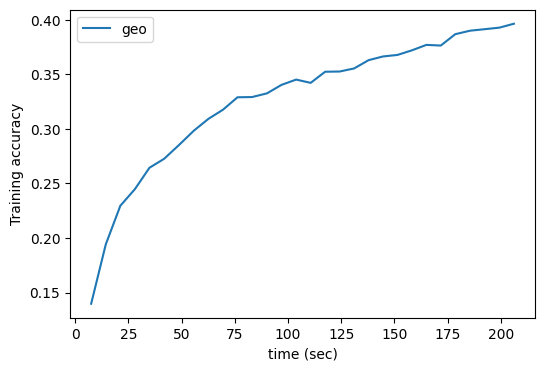

<Figure size 640x480 with 0 Axes>

In [56]:
pl.figure(figsize = (6,4))
# pl.plot(results_local[:,1], results[:,0], '-*', label = 'local')
pl.plot(results_geo[:,1], results[:,0], '-', label = 'geo')
pl.legend()
pl.ylabel('Training accuracy')

pl.xlabel('time (sec)')
pl.show()
pl.clf()